In [3]:
import pandas as pd

df_train = pd.read_csv("Review_train.csv")

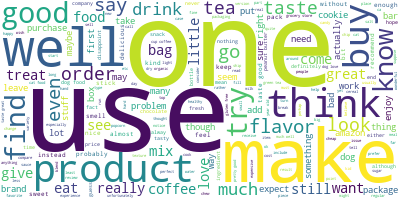

In [4]:
#pip install wordcloud

# Leggyakrabban használt szavak az adathalmazban (BPE tokenizáció)

from wordcloud import WordCloud

long_string = ','.join([i.replace('br ', ' ') for i in df_train['Text']])

wordcloud = WordCloud(background_color="white", 
                      max_words=1000, 
                      contour_width=3, 
                      contour_color='steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

In [5]:
#pip install gensim

import gensim.corpora as corpora

text = df_train['Text']

data_words = [item.split() for item in text]

id2word = corpora.Dictionary(data_words)

print(id2word)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
Dictionary(38314 unique tokens: ['cost', 'expect', 'grainy', 'line', 'one']...)


In [6]:
#Dokumentum szótár felépítése (index - gyakoriság)

corpus = [id2word.doc2bow(text) for text in data_words]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [7]:
#Szavakhoz gyakorisági súly hozzárendelése

import gensim

num_topics = 102

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=102)

lda_model.print_topics()

[(87,
  '0.022*"amazon" + 0.017*"good" + 0.015*"buy" + 0.011*"pasta" + 0.011*"love" + 0.010*"br" + 0.009*"product" + 0.009*"well" + 0.009*"great" + 0.008*"price"'),
 (25,
  '0.072*"br" + 0.019*"dog" + 0.013*"like" + 0.011*"would" + 0.011*"good" + 0.009*"product" + 0.009*"food" + 0.008*"buy" + 0.008*"taste" + 0.007*"flavor"'),
 (90,
  '0.014*"like" + 0.013*"taste" + 0.013*"try" + 0.012*"flavor" + 0.010*"product" + 0.009*"would" + 0.009*"treat" + 0.009*"make" + 0.008*"love" + 0.008*"dog"'),
 (2,
  '0.012*"product" + 0.011*"br" + 0.011*"make" + 0.010*"food" + 0.010*"would" + 0.009*"use" + 0.009*"well" + 0.008*"get" + 0.008*"mix" + 0.007*"time"'),
 (12,
  '0.021*"coffee" + 0.018*"br" + 0.013*"like" + 0.012*"get" + 0.010*"one" + 0.010*"try" + 0.009*"would" + 0.009*"drink" + 0.009*"good" + 0.009*"product"'),
 (77,
  '0.023*"br" + 0.017*"flavor" + 0.013*"coffee" + 0.012*"taste" + 0.010*"get" + 0.009*"sugar" + 0.009*"buy" + 0.008*"use" + 0.008*"good" + 0.007*"like"'),
 (65,
  '0.045*"br" + 0.0

In [12]:
#Vizualizáció

import os
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./data/lda_'+str(num_topics))

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, './data/lda_'+ str(num_topics) +'.html')

LDAvis_prepared

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10    -0.135556 -0.028764       1        1  5.406284
58     0.066650  0.035815       2        1  5.149550
35     0.071421 -0.079470       3        1  3.491157
88     0.020238 -0.031116       4        1  2.220492
92    -0.038248 -0.014478       5        1  2.153572
...         ...       ...     ...      ...       ...
48    -0.004220 -0.009991      98        1  0.440897
50     0.004313  0.001297      99        1  0.384714
57     0.010266  0.016233     100        1  0.364897
41     0.036572 -0.028637     101        1  0.357154
61    -0.035091  0.098456     102        1  0.330418

[102 rows x 5 columns], topic_info=       Term          Freq         Total  Category  logprob  loglift
51       br  93324.000000  93324.000000   Default  30.0000  30.0000
402  coffee  33378.000000  33378.000000   Default  29.0000  29.0000
151     tea  15505.000000  15505.000000   Default  28.0000  28.0000
532     dog  20616.000000  20616.000000   Default  27.0000  27.0000
60     like  43520.000000  43520.000000   Default  26.0000  26.0000
..      ...           ...           ...       ...      ...      ...
48      try     54.250131  22048.322578  Topic102  -5.2807  -0.2948
467    love     49.461895  16777.323846  Topic102  -5.3731  -0.1140
326     mix     45.065023   6619.826732  Topic102  -5.4662   0.7229
213    also     46.537739  10600.174751  Topic102  -5.4341   0.2842
92       go     43.261642  13226.077501  Topic102  -5.5071  -0.0101

[8689 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
11063      4  0.049568   abc
11063     29  0.148704   abc
11063     49  0.446112   abc
11063     65  0.049568   abc
11063     67  0.148704   abc
...      ...       ...   ...
3916      89  0.003102  zuke
3916      97  0.003102  zuke
3916      98  0.006203  zuke
3916     101  0.003102  zuke
20699     41  0.434102    ît

[73790 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 59, 36, 89, 93, 70, 19, 38, 5, 100, 28, 26, 61, 27, 75, 77, 25, 31, 35, 52, 4, 97, 6, 87, 60, 73, 39, 67, 83, 90, 45, 94, 16, 76, 81, 79, 46, 88, 80, 30, 7, 92, 65, 24, 14, 72, 63, 69, 64, 8, 18, 55, 32, 47, 21, 102, 82, 44, 34, 48, 50, 33, 17, 13, 15, 41, 85, 1, 99, 10, 98, 53, 101, 22, 66, 57, 2, 43, 84, 95, 68, 96, 91, 40, 74, 9, 54, 37, 12, 3, 29, 71, 56, 78, 86, 20, 23, 49, 51, 58, 42, 62])